# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
#inDir = '/home/group/NSLSII_Data/CMS/2020_Cycle3/SWong/saxs/raw/'
inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/Test/Results/Stitched/SAXS/'
print('The input dir is: %s'%inDir)



The input dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/Test/Results/Stitched/SAXS/


In [3]:
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/'

outDir = create_fullpath(  outDir )
outDir =  create_dir(  'Results/', outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:
username_ = 'SW'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_T'  ] )

Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 10 files for user: SW in this run.


In [5]:
flists

['SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff',
 'SW_100nmAgNWs_5min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35578_stitched_saxs.tiff',
 'SW_100nmAgNWs_10min_pos1_x0.000_y0.000_T-273.150C_30.00s_35580_stitched_saxs.tiff',
 'SW_100nmAgNWs_15min_pos1_x0.000_y0.000_T-273.150C_30.00s_35582_stitched_saxs.tiff',
 'SW_100nmAgNWs_20min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35584_stitched_saxs.tiff',
 'SW_100nmAgNWs_25min_pos1_x0.000_y-0.000_T-273.150C_30.00s_35586_stitched_saxs.tiff',
 'SW_100nmAgNWs_30min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35588_stitched_saxs.tiff',
 'SW_100nmAgNWs_40min_pos1_x0.000_y0.000_T-273.150C_30.00s_35590_stitched_saxs.tiff',
 'SW_100nmAgNWs_50min_pos1_x0.000_y0.000_T-273.150C_30.00s_35592_stitched_saxs.tiff',
 'SW_100nmAgNWs_60min_pos1_x0.000_y0.000_T-273.150C_30.00s_35594_stitched_saxs.tiff']

In [6]:
flists_clean

array(['SW_100nmAgNWs_1min_pos1_x0_y0_T-273.150C_30.00s_35576_stitched_saxs.tiff',
       'SW_100nmAgNWs_5min_pos1_x0_y0_T-273.150C_30.00s_35578_stitched_saxs.tiff',
       'SW_100nmAgNWs_10min_pos1_x0_y0_T-273.150C_30.00s_35580_stitched_saxs.tiff',
       'SW_100nmAgNWs_15min_pos1_x0_y0_T-273.150C_30.00s_35582_stitched_saxs.tiff',
       'SW_100nmAgNWs_20min_pos1_x0_y0_T-273.150C_30.00s_35584_stitched_saxs.tiff',
       'SW_100nmAgNWs_25min_pos1_x0_y0_T-273.150C_30.00s_35586_stitched_saxs.tiff',
       'SW_100nmAgNWs_30min_pos1_x0_y0_T-273.150C_30.00s_35588_stitched_saxs.tiff',
       'SW_100nmAgNWs_40min_pos1_x0_y0_T-273.150C_30.00s_35590_stitched_saxs.tiff',
       'SW_100nmAgNWs_50min_pos1_x0_y0_T-273.150C_30.00s_35592_stitched_saxs.tiff',
       'SW_100nmAgNWs_60min_pos1_x0_y0_T-273.150C_30.00s_35594_stitched_saxs.tiff'],
      dtype='<U82')

### Using a two-layered dict to sort the files 

In [7]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [8]:
cut_pattern= r'(_pos)'

sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys()) 
N = len(ks)
print( 'There are %s samples.'%(N))

There are 10 samples.


In [9]:
sams

{'SW_100nmAgNWs_1min': 1,
 'SW_100nmAgNWs_5min': 1,
 'SW_100nmAgNWs_10min': 1,
 'SW_100nmAgNWs_15min': 1,
 'SW_100nmAgNWs_20min': 1,
 'SW_100nmAgNWs_25min': 1,
 'SW_100nmAgNWs_30min': 1,
 'SW_100nmAgNWs_40min': 1,
 'SW_100nmAgNWs_50min': 1,
 'SW_100nmAgNWs_60min': 1}

In [10]:
ks[5] #, sam_dict[ks[0]]

'SW_100nmAgNWs_25min'

##  Load Mask if has one

<IPython.core.display.Javascript object>


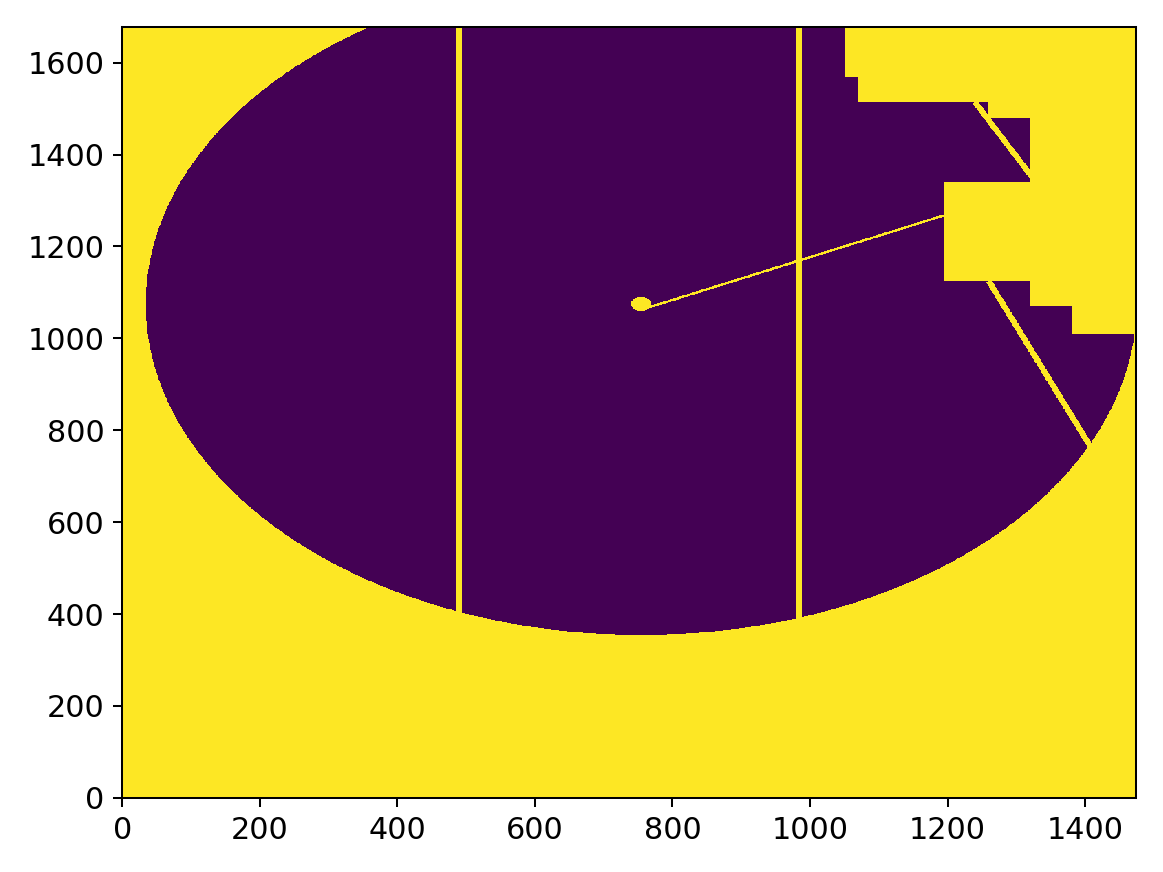

In [11]:
mask =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/' + 'mask_saxs_2020C3_SWong_noygap.npy')
show_img(mask)
#mask = None

## Define data analysis parameters and methods

### A SAXS

In [12]:
username = 'Test'
beamline = 'CMS'
cycle='2020_C3'


#geometry   =  'Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/  13.5 )
sdd_mm = 5030.0  
b_xy = [ 754, 1679 - 604  ]
bs_xy = [ 0, 50]   
incident_angle = 0
det_str = 'Pilatus2m'
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )    

## Setup the class
SC = CMS_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 


### Methods

In [13]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F    


if T:    
    ###########################
    #for SAXS
    ########################### 
    save_raw= T
    do_qimg = T
    do_plot_raw = T # True
    do_ciravg = T #False  #True  
    do_ciravg_sector = T #False  #True
    #for the angle range, the v-up is ~0, l-left, ~90;  v-down ~ 180/-180; h-right -90, 
    ciravg_sector_angle_wid = 20 
    ciravg_sector_angles = [  0, 90, 180, -90   ]
    show_ciravg_sector = T    
    do_qphi = T 
    do_q_qphi = T
    do_p_qphi = T 
    

    
    
    

In [14]:
#%matplotlib inline

In [15]:
sample_list = ks[ : ]
sample_list = ks[ :1 ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list, sam_dict[sample_list[0]]  )

['SW_100nmAgNWs_1min'] ['SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff']


In [16]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

The sample is: SW_100nmAgNWs_1min.
The filelist for this sample is: ['SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff'].
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/  already exists


<IPython.core.display.Javascript object>


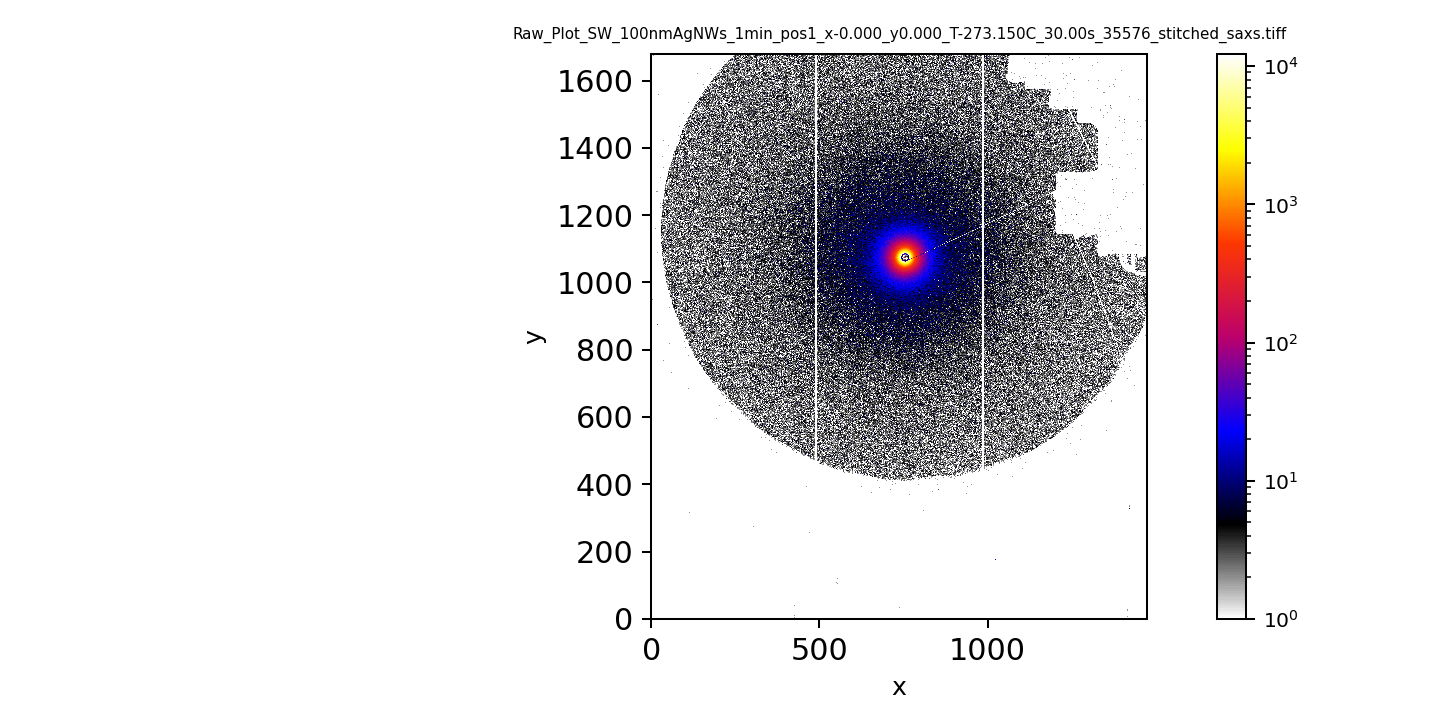

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


<IPython.core.display.Javascript object>


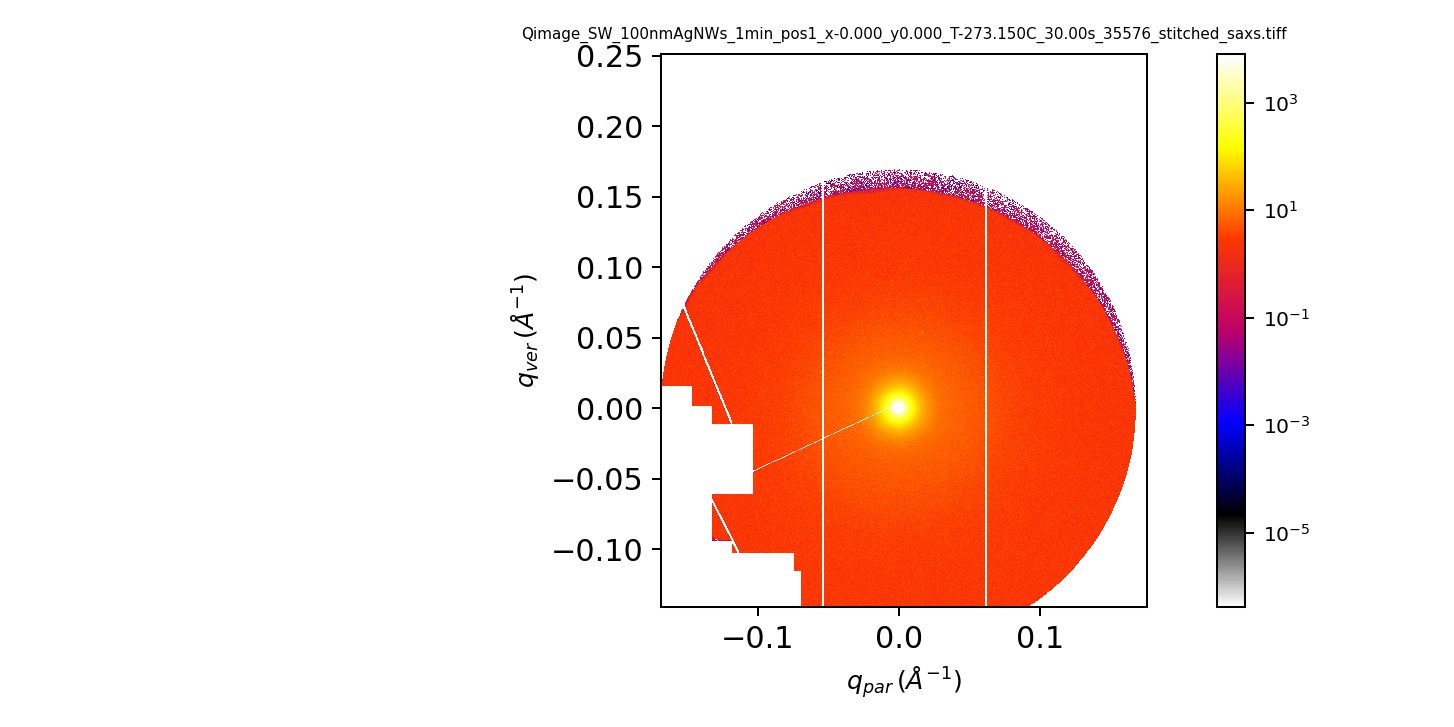

The file: Cir_Avg_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/Cir_Avg/


<IPython.core.display.Javascript object>


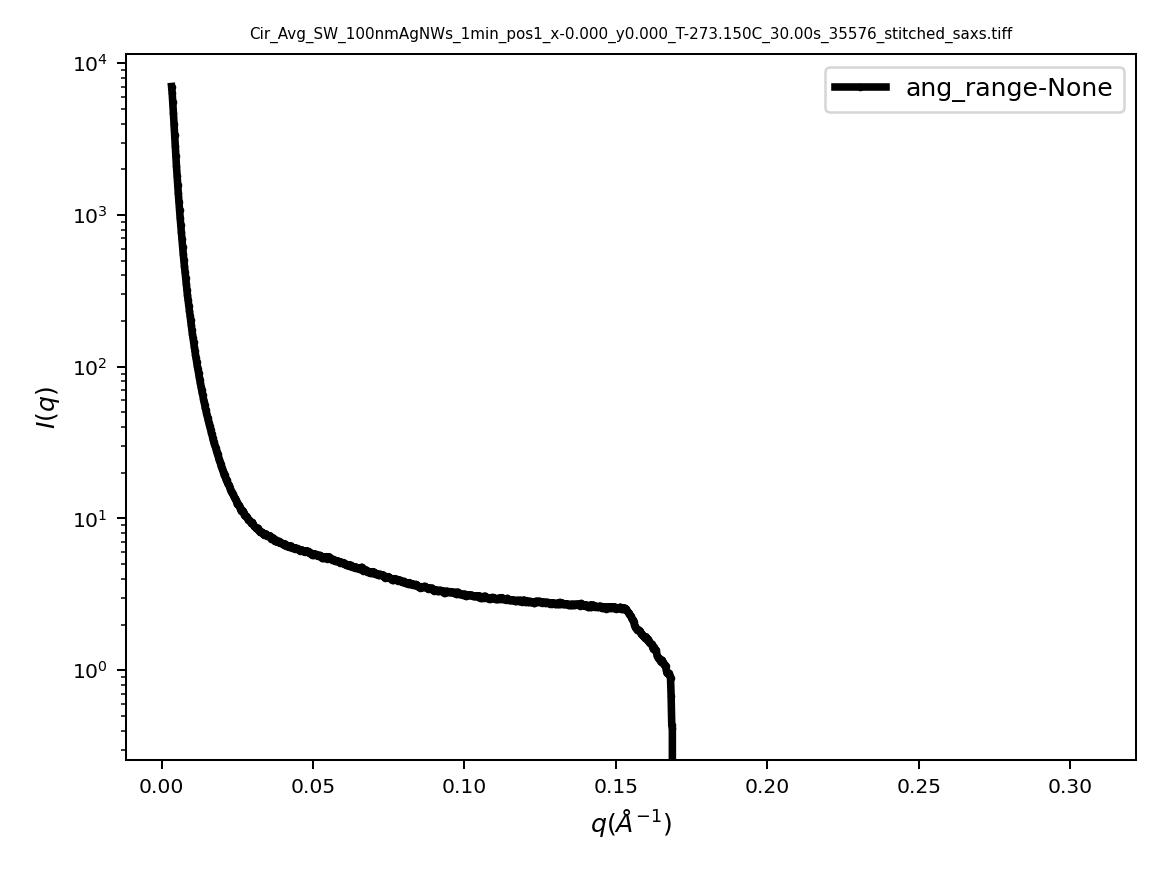

The file: Cir_Avg_Sector_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff_angle=-20_20.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff_angle=70_110.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff_angle=160_200.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff_angle=-110_-70.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/Cir_Avg_Sector/


<IPython.core.display.Javascript object>


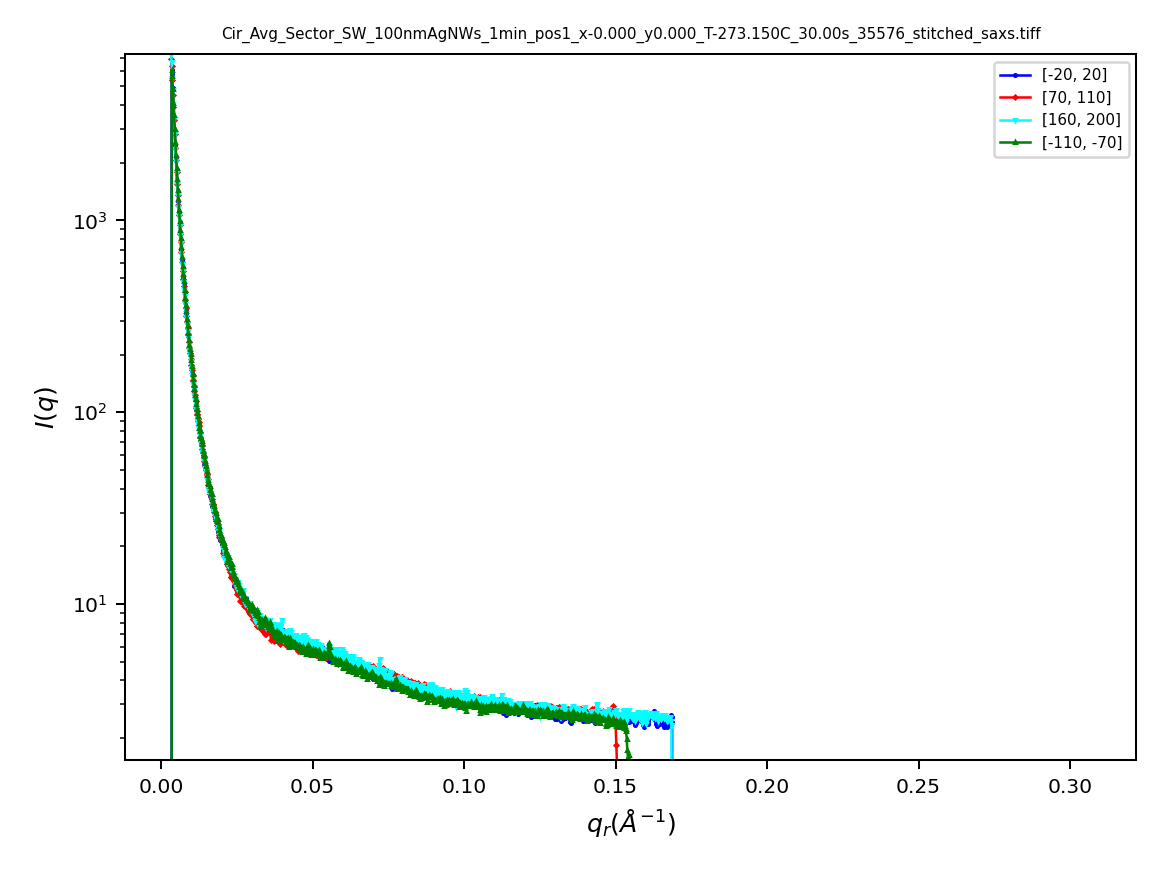

/home/group/Software/pyScatt/pyScatt/Pipeline_Funcs.py:199: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(  ylim  )


<IPython.core.display.Javascript object>


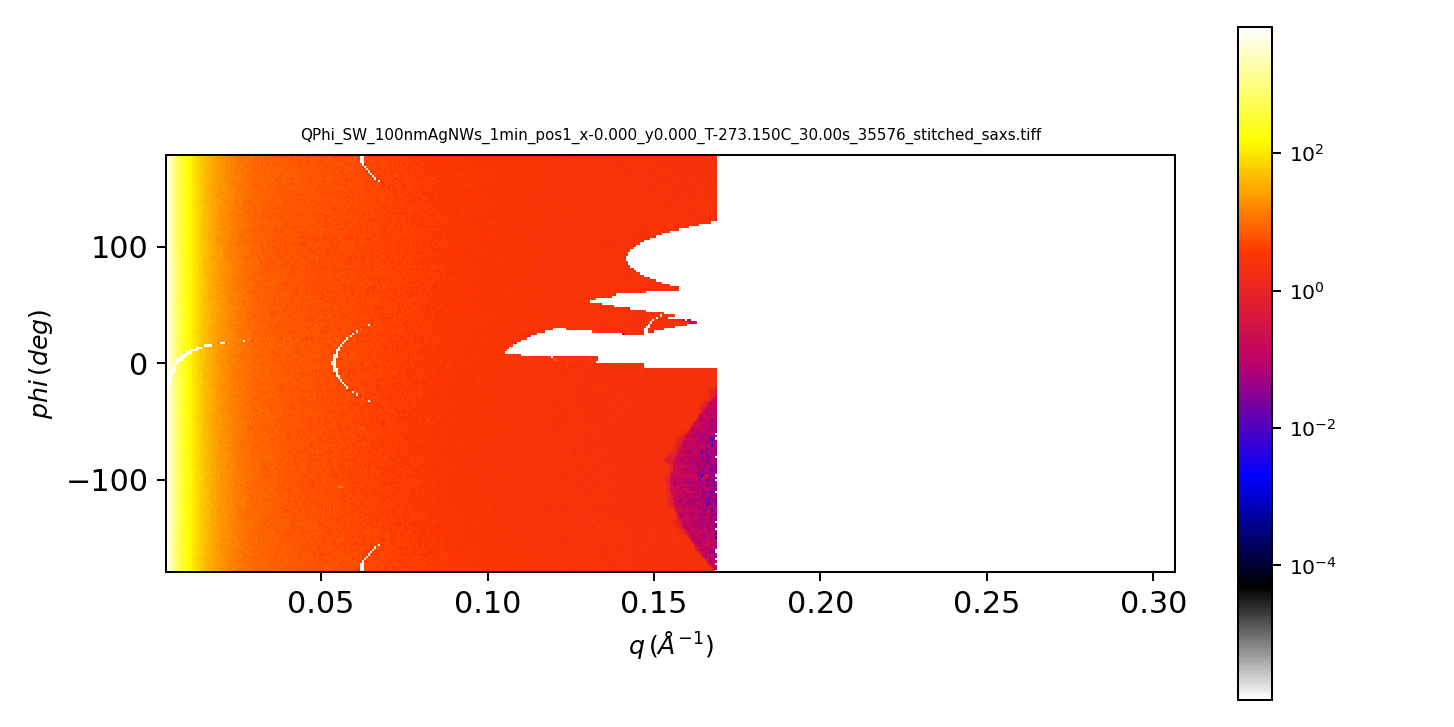

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: QPhi_qiq_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/QPhi/


/home/group/Software/pyScatt/pyScatt/generic_functions.py:642: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


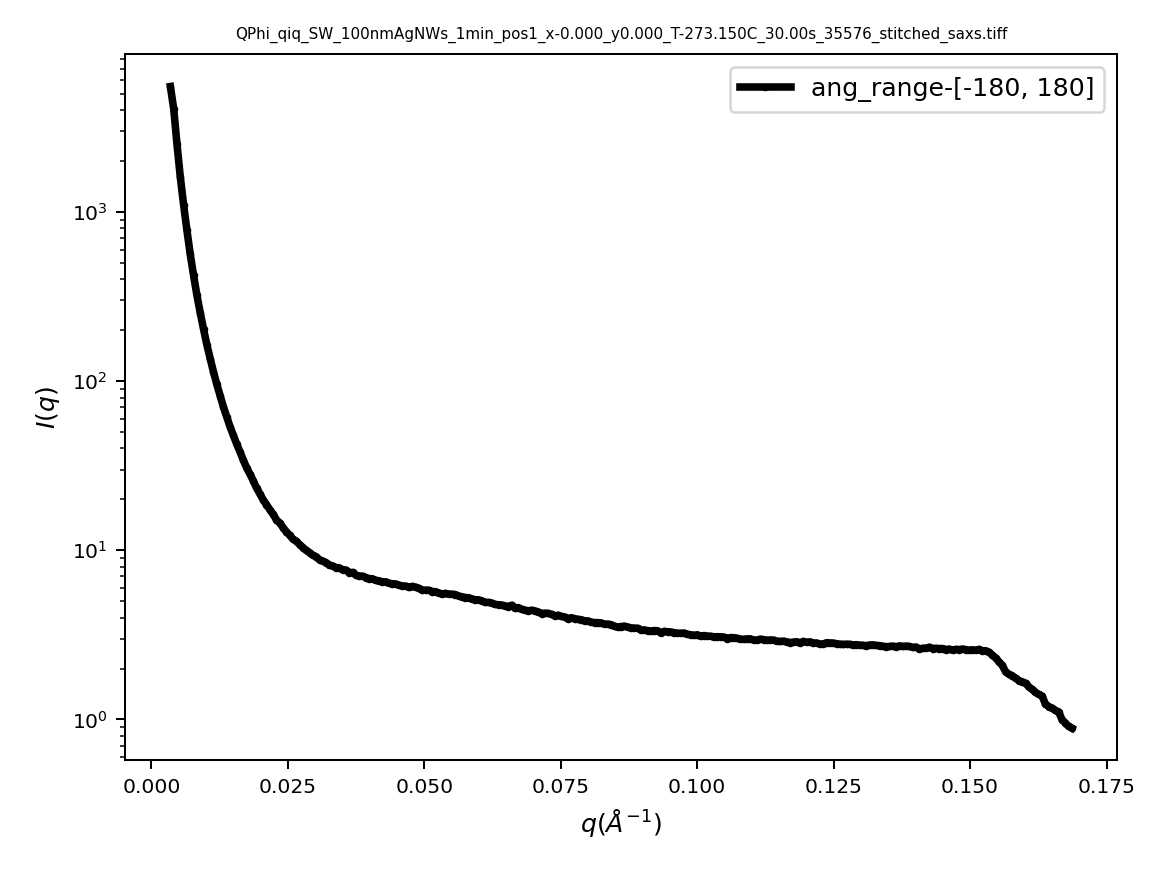

The file: QPhi_pip_SW_100nmAgNWs_1min_pos1_x-0.000_y0.000_T-273.150C_30.00s_35576_stitched_saxs.tiff.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/SAXS/QPhi/


<IPython.core.display.Javascript object>


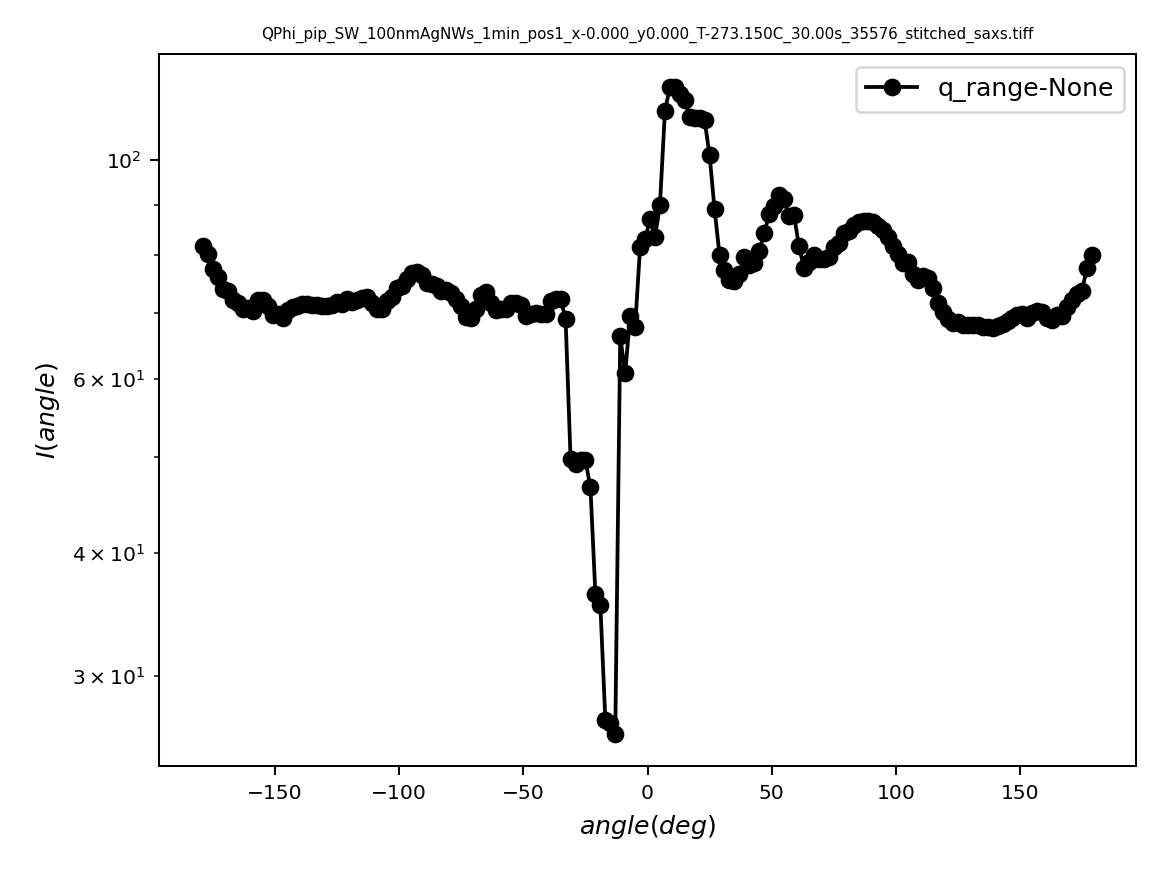

Done


In [17]:
#loop samples
for sam in sample_list: 
    print( 'The sample is: %s.'%sam)    
    fps = sam_dict[sam] [:]
    print( 'The filelist for this sample is: %s.'%fps)  
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'SAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/') 
    SC = CMS_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {} 
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=None, fontsize=6, )  
        #######################################
        #plot qimg
        ########################################              
        if do_qimg:
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None, 
                                           mask= mask, x='Qr', y='Qz', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i  )             
            
        #######################################
        #Do circular average
        ########################################  
        if do_ciravg: 
            q_ca,iq_ca = SC.img_circular_average(img=SC.imgs[i],Qrange=None,Prange=None,
                                                     bins=1500,method='ai',mask=mask)
            run_save_ciravg(  SC, ki=i  )  
            peaks = None 
            run_plot_ciravg( SC, ki =i, peaks = peaks,xlim= None, ylim=None,fontsize=6, )             
        #######################################
        #Do sector circular average
        ########################################  
        if do_ciravg_sector:  
            Prange =   [ [w-ciravg_sector_angle_wid, w+ciravg_sector_angle_wid] for w in  ciravg_sector_angles  ]
            qiqs_cas  = SC.img_circular_average_sector( img=SC.imgs[i], 
                                        Qrange=None,Prange=Prange,bins=1500,mask= mask ) 
            run_save_ciravg_sector( SC, ki=i  )
            run_plot_ciravg_sector( SC, ki=i ) #, xlim=[0,8], ylim=[.1, 1e5]  )      
   
        #######################################
        #Do q-phi analysis
        ########################################              
        if do_qphi:  
            qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;     
            q_QP, phi_QP, qphi_QP = SC.img_to_qphi(img=SC.imgs[i],Qrange=Qrange,Prange=Prange,                                                      
                                                      bins=qphi_bins,method='ai',mask=mask)
            run_save_Qqphi( SC, ki=i  )
            run_plot_Qqphi( SC, ki=i, fontsize=6, vmin= None, vmax=None, aspect= 0.00035, ) 
            if do_q_qphi:
                q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
                run_save_q_iq_qphi( SC,ki=i )
                run_plot_q_iq_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )
            if do_p_qphi:  
                q_range_roi = None 
                #q_range_roi = [ 2.65-.05, 2.65 + .05 ]
                p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
                run_save_p_ip_qphi( SC,ki=i )
                run_plot_p_ip_qphi( SC,ki=i, peaks = None, xlim= None, ylim=None,fontsize=6, )
         
        
        #####################
        ## save data to h5 file 
        res = SC.res_to_dict(  do_stitch=do_stitch, 
                     do_ciravg = do_ciravg, do_ciravg_sector = do_ciravg_sector,
                     do_qimg=do_qimg, do_qphi = do_qphi,  
                     do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                            )      
        K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
        K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
        RES[ SC.md['filenames'][i] ] = res
    K='md';RES[K] = {};RES[K].update( SC.md   ) 
    if save_raw:
        res2 = SC.res_to_dict(  save_raw=True )
        RES.update( res2   )
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                         h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done') 



# THE END